### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

# Dilan Koc

## Assignment 

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 : Linear regression using Python
The marketing department wants to better understand how users accumulate loyalty points. Therefore, investigate the possible relationships between the loyalty points, age, remuneration, and spending scores.

## 1. Load and explore the data

In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm 
from statsmodels.formula.api import ols

import warnings  
warnings.filterwarnings('ignore')  

In [2]:
# Load the CSV file as reviews.
df = pd.read_csv('Desktop/ASSIGNMENT-3/turtle_reviews.csv')


# View the DataFrame.
df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Determine whether the dataset has any missing values.
print("Number of missing values in each column:")
print(df.isna().sum().sort_values(ascending=False))


Number of missing values in each column:
gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [4]:
# Explore the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


[Text(0.5, 1.0, 'Loyalty Points')]

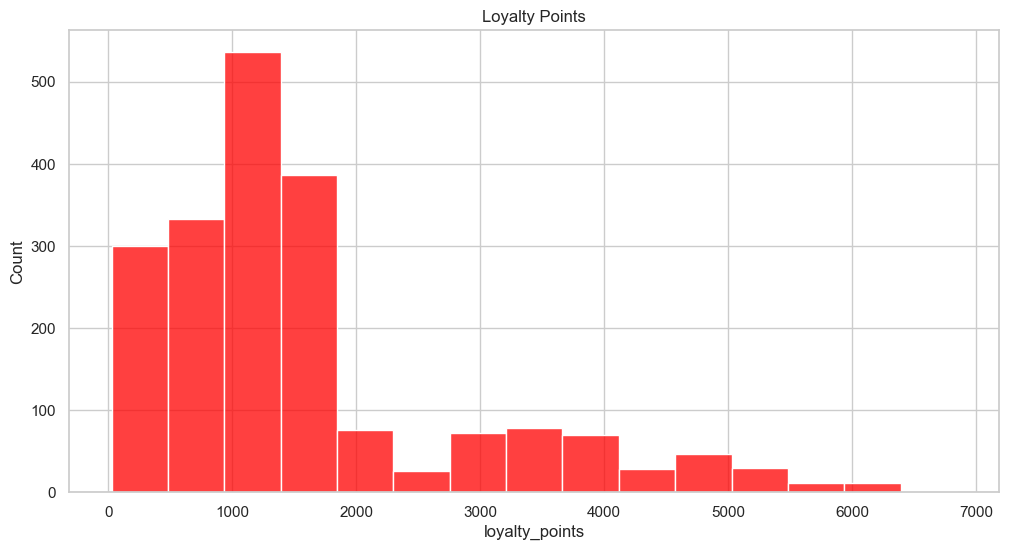

In [6]:
# Create a histogram to check distribution of loyalty points (y variable).
sns.set(rc = {'figure.figsize': (12,6)})
sns.set_theme(style = 'whitegrid')
sns.histplot(data = df, x = 'loyalty_points', bins = 15, color = 'red')\
.set(title = "Loyalty Points")

Note :
In order to use linear regression y variable needs to have a normal distribution. Given that, to accumulate loyalty
points, we might not have accurate results, as the histogram shows y variable does not follow a normal distribution ( Positive skewed).

## 2. Drop columns

In [6]:
# Drop unnecessary columns.
turtle = df.drop(['language', 'platform'], axis=1)

# View column names.
turtle.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [7]:
# Rename the column headers.
turtle.rename(columns={'remuneration (k£)' : 'remuneration', 'spending_score (1-100)' : 'spending_score'}, inplace=True)

# View column names.
turtle.columns

Index(['gender', 'age', 'remuneration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
turtle.to_csv(r'Desktop/ASSIGNMENT-3/turtle_reviews_clean.csv', index=False)

## 5. Linear regression

### 5a) spending_score vs loyalty_points

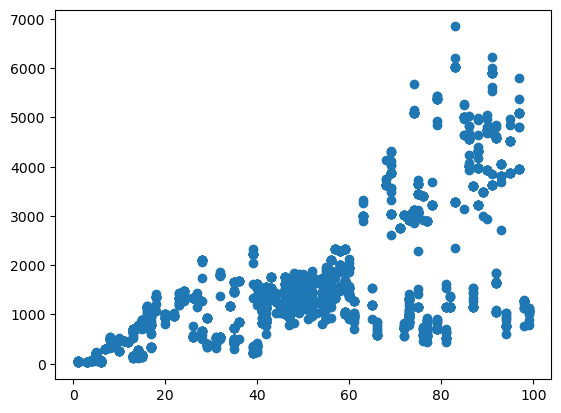

In [8]:
# Independent variable.
X = turtle['spending_score'].values.reshape(-1, 1)

# Dependent variable.
y = turtle['loyalty_points'].values.reshape(-1, 1)

# Check for linearity.
plt.scatter(X, y)

In [9]:
# OLS Method.
f = 'y ~ X'

test = ols(f, data = df).fit()

# View the results.
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          2.92e-263
Time:                        03:21:20   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.1

In [11]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 33.0617 * X + (-75.0527)

# View the output.
y_pred

array([[1214.3536],
       [2602.945 ],
       [ 123.3175],
       ...,
       [2933.562 ],
       [ 453.9345],
       [ 189.4409]])

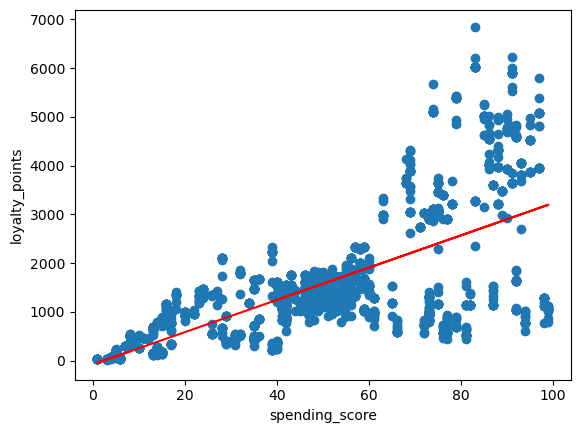

In [12]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')
plt.xlabel("spending_score")
plt.ylabel("loyalty_points")


# Save and export figure.
plt.savefig('spending_scoreVSloyalty_points.png')

Text(0.5, 1.0, 'Log Values')

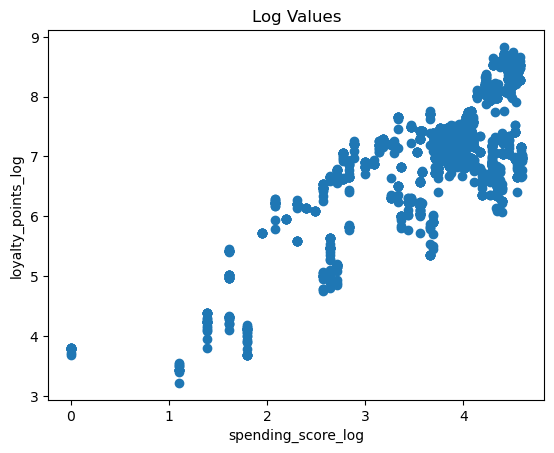

In [13]:
# Convert the data to log values.
turtle['loyalty_points_log'] = np.log(turtle['loyalty_points'])
turtle['spending_score_log'] = np.log(turtle['spending_score'])

# Define the dependent variable.
l = turtle['loyalty_points_log']

# Define the first of the independent variables.
g = turtle['spending_score_log']

# Check for linearity.
plt.scatter(g, l)
plt.xlabel("spending_score_log")
plt.ylabel("loyalty_points_log")
plt.title("Log Values")

In [14]:
# Run the regression.
f2 = 'g ~ l'

test2 = ols(f2, data = turtle).fit()

print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     4033.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:12   Log-Likelihood:                -1368.9
No. Observations:                2000   AIC:                             2742.
Df Residuals:                    1998   BIC:                             2753.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9871      0.074    -13.297      0.0

Text(0.5, 1.0, 'sqrt values')

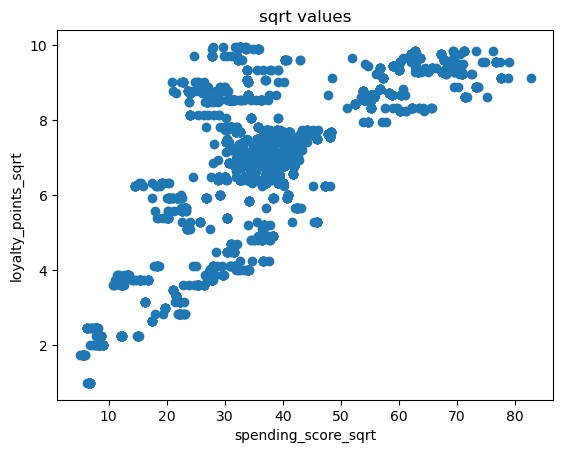

In [15]:
# Convert the data to sqrt values.
turtle['loyalty_points_sqrt'] = np.sqrt(turtle['loyalty_points'])
turtle['spending_score_sqrt'] = np.sqrt(turtle['spending_score'])

# Define the dependent variable.
s = turtle['loyalty_points_sqrt']

# Define the first of the independent variables.
q = turtle['spending_score_sqrt']

# Check for linearity.
plt.scatter(s, q)
plt.xlabel("spending_score_sqrt")
plt.ylabel("loyalty_points_sqrt")
plt.title("sqrt values")


In [16]:
# Run the regression.
f3 = 'q ~ s'

test3 = ols(f3, data = turtle).fit()

print(test3.summary())


                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     2319.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:42:23   Log-Likelihood:                -3569.4
No. Observations:                2000   AIC:                             7143.
Df Residuals:                    1998   BIC:                             7154.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0670      0.083     36.981      0.0

### 5b) renumeration vs loyalty_points

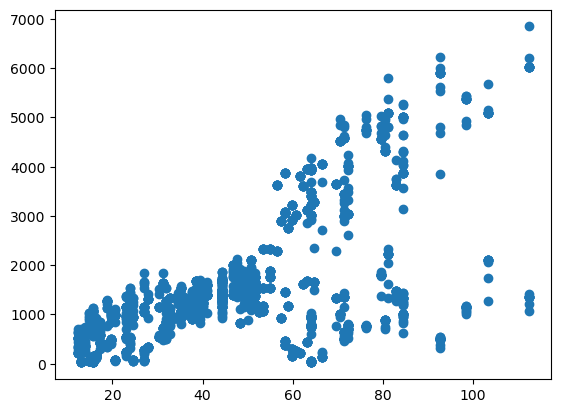

In [5]:
# Independent variable.
X = turtle['remuneration']

# Dependent variable.
y = turtle['loyalty_points']
           
# Check for linearity.
plt.scatter(X, y)


In [6]:
# OLS Method.
f = 'y ~ X'

test = ols(f, data = df).fit()

# View the results.
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          2.43e-209
Time:                        22:11:12   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.2

In [7]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 34.1878 * X + (-65.6865)

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

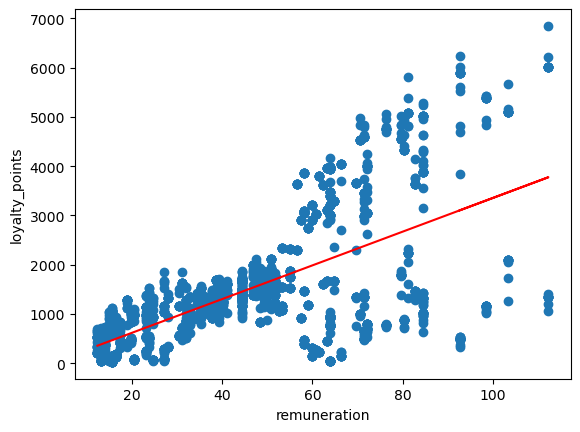

In [8]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')
plt.xlabel("remuneration")
plt.ylabel("loyalty_points")


# Save and export figure.
plt.savefig('renumerationVSloyalty_points.png')

Text(0.5, 1.0, 'Log Values')

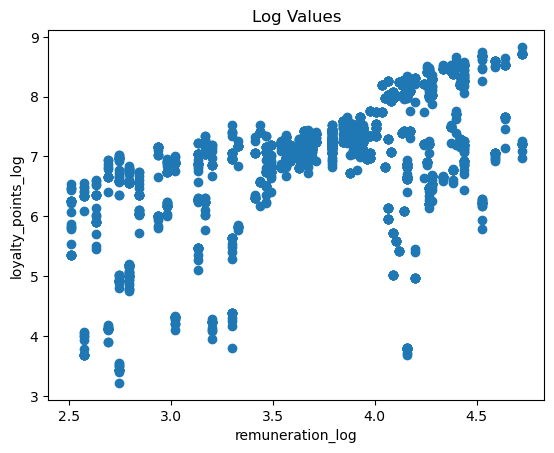

In [12]:
# Convert the data to log values.
turtle['loyalty_points_log'] = np.log(turtle['loyalty_points'])
turtle['remuneration_log'] = np.log(turtle['remuneration'])

# Define the dependent variable.
l = turtle['loyalty_points_log']

# Define the first of the independent variables.
g = turtle['remuneration_log']

# Check for linearity.
plt.scatter(g, l)
plt.xlabel("remuneration_log")
plt.ylabel("loyalty_points_log")
plt.title("Log Values")

In [13]:
# Run the regression.
f2 = 'g ~ l'

test2 = ols(f2, data = turtle).fit()

print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1033.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          4.96e-183
Time:                        21:43:31   Log-Likelihood:                -1226.0
No. Observations:                2000   AIC:                             2456.
Df Residuals:                    1998   BIC:                             2467.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5398      0.069     22.278      0.0

Text(0.5, 1.0, 'sqrt values')

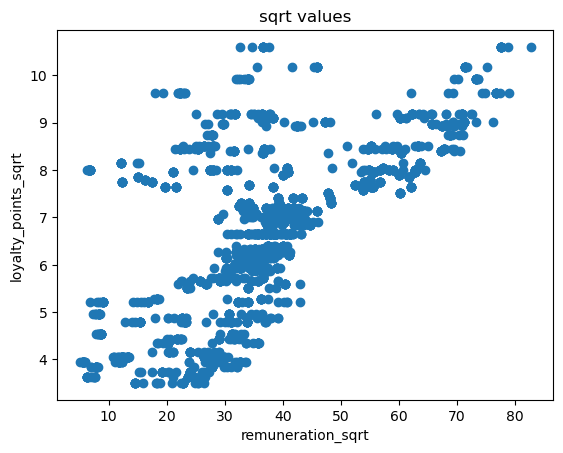

In [14]:
# Convert the data to sqrt values.
turtle['loyalty_points_sqrt'] = np.sqrt(turtle['loyalty_points'])
turtle['remuneration_sqrt'] = np.sqrt(turtle['remuneration'])

# Define the dependent variable.
s = turtle['loyalty_points_sqrt']

# Define the first of the independent variables.
q = turtle['remuneration_sqrt']

# Check for linearity.
plt.scatter(s, q)
plt.xlabel("remuneration_sqrt")
plt.ylabel("loyalty_points_sqrt")
plt.title("sqrt values")


In [15]:
# Run the regression.
f3 = 'q ~ s'

test3 = ols(f3, data = turtle).fit()

print(test3.summary())


                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1251.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):          3.77e-213
Time:                        21:43:41   Log-Likelihood:                -3435.5
No. Observations:                2000   AIC:                             6875.
Df Residuals:                    1998   BIC:                             6886.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1905      0.078     54.027      0.0

### 5c) age vs loyalty_points

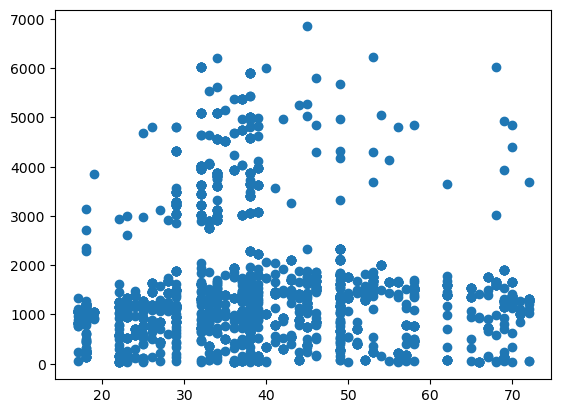

In [5]:
# Independent variable.
X = turtle['age']

# Dependent variable.
y = turtle['loyalty_points']

# Check for linearity.
plt.scatter(X, y)

In [6]:
# OLS Method.
f = 'y ~ X'

test = ols(f, data = df).fit()

# View the results.
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Sat, 10 Sep 2022   Prob (F-statistic):             0.0577
Time:                        22:13:11   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.0

In [7]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -4.0128 * X + 1736.5177

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

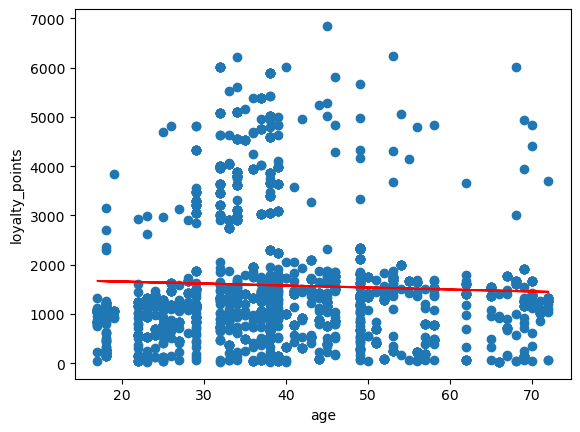

In [8]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')
plt.xlabel("age")
plt.ylabel("loyalty_points")

# Save and export figure.
plt.savefig('ageVSloyalty_points.png')

Text(0.5, 1.0, 'Log Values')

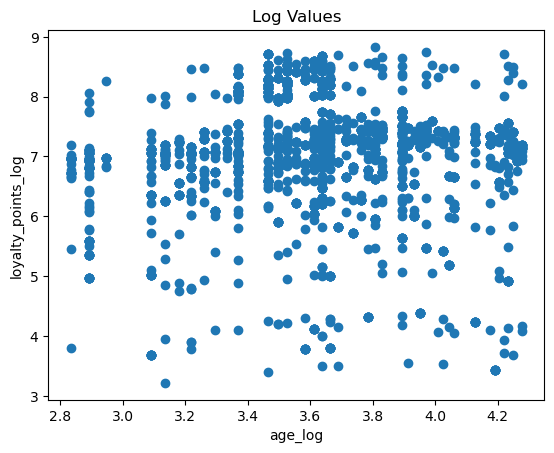

In [9]:
# Convert the data to log values.
turtle['loyalty_points_log'] = np.log(turtle['loyalty_points'])
turtle['age_log'] = np.log(turtle['age'])

# Define the dependent variable.
l = turtle['loyalty_points_log']

# Define the first of the independent variables.
g = turtle['age_log']

# Check for linearity.
plt.scatter(g, l)
plt.xlabel("age_log")
plt.ylabel("loyalty_points_log")
plt.title("Log Values")

In [13]:
# Run the regression.
f2 = 'g ~ l'

test2 = ols(f2, data = turtle).fit()

print(test2.summary())

                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1584
Date:                Sat, 10 Sep 2022   Prob (F-statistic):              0.691
Time:                        21:44:47   Log-Likelihood:                -731.86
No. Observations:                2000   AIC:                             1468.
Df Residuals:                    1998   BIC:                             1479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5955      0.054     66.601      0.0

Text(0.5, 1.0, 'sqrt values')

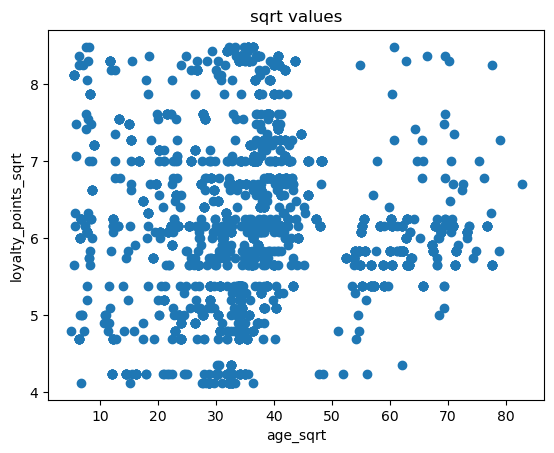

In [14]:
# Convert the data to sqrt values.
turtle['loyalty_points_sqrt'] = np.sqrt(turtle['loyalty_points'])
turtle['age_sqrt'] = np.sqrt(turtle['age'])

# Define the dependent variable.
s = turtle['loyalty_points_sqrt']

# Define the first of the independent variables.
q = turtle['age_sqrt']

# Check for linearity.
plt.scatter(s, q)
plt.xlabel("age_sqrt")
plt.ylabel("loyalty_points_sqrt")
plt.title("sqrt values")


In [15]:
# Run the regression.
f3 = 'q ~ s'

test3 = ols(f3, data = turtle).fit()

print(test3.summary())


                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1400
Date:                Sat, 10 Sep 2022   Prob (F-statistic):              0.708
Time:                        21:44:58   Log-Likelihood:                -2969.9
No. Observations:                2000   AIC:                             5944.
Df Residuals:                    1998   BIC:                             5955.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2142      0.061    101.119      0.0

## 5. Multiple Linear Regression

In [8]:
# Import libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import sklearn

from sklearn import datasets
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings  
warnings.filterwarnings('ignore')  

In [9]:
# Define dependent variables
X = turtle[['age', 'remuneration', 'spending_score']]

# Define independent variable.
y = turtle['loyalty_points']

In [10]:
# Split the dataset into traning set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

# Specify the model.
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Fit the model.
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_train))

# Print the summary of the model
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:46:02   Log-Likelihood:                -12227.
No. Observations:                1600   AIC:                         2.446e+04
Df Residuals:                    1596   BIC:                         2.448e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2203.3411     58.253    -37.

## Observations

Multiple Linear Regression seems like a better option according to the "Adj.R-squared" value and the "p-value". Upon request it can be further investigated.


# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments..

## 1. Load and explore the data

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the CSV file.
turtle_clustering = pd.read_csv('Desktop/ASSIGNMENT-3/turtle_reviews_clean.csv')

# View DataFrame.
turtle_clustering

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [3]:
# Explore the data.
turtle_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [4]:
# Descriptive statistics.
turtle_clustering.describe()

,age,remuneration,spending_score,loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

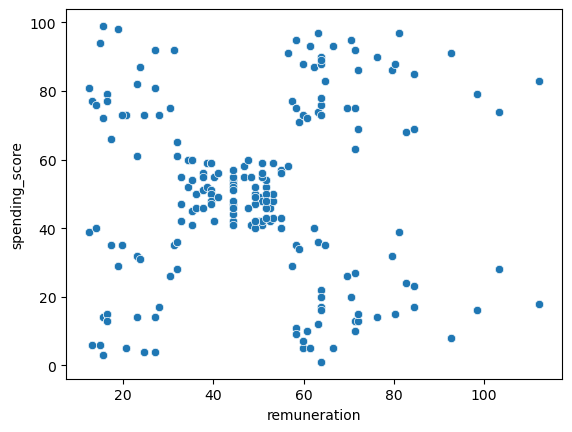

In [5]:
# Visualise the variables with scatterplot.
sns.scatterplot(x = 'remuneration', y = 'spending_score', data = turtle_clustering)

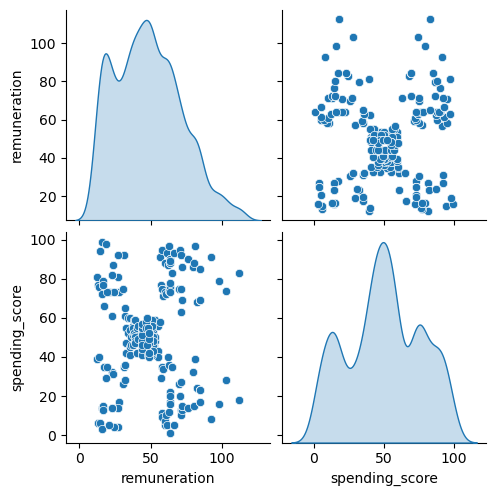

In [6]:
# Visualise the variables with pairplot.
c = turtle_clustering[['remuneration', 'spending_score']]

sns.pairplot(turtle_clustering, vars = c, diag_kind = 'kde')

## 3. Elbow and silhoutte methods

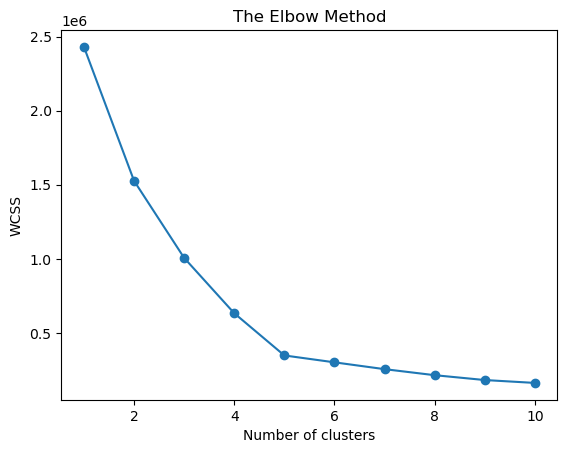

In [7]:
# Determine the number of clusters: Elbow method.
wcss = []

for e in range(1, 11):
    kmeans = KMeans(n_clusters = e, init = 'k-means++', max_iter = 800, n_init = 50, random_state = 0)
    kmeans.fit(c)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss, marker = 'o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


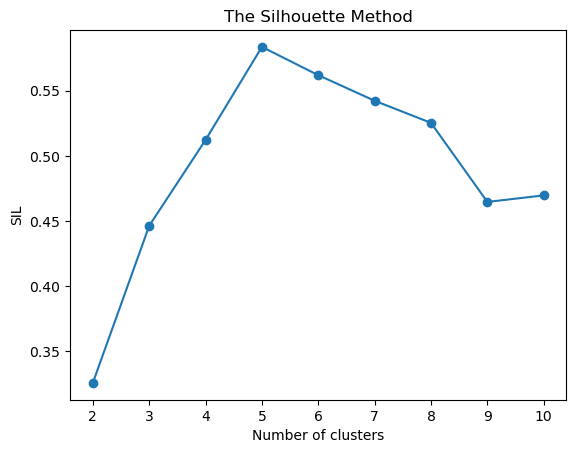

In [8]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for s in range(2, kmax + 1):
    kmeans_s = KMeans(n_clusters = s)
    kmeans_s.fit(c)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(c, labels, metric = 'euclidean'))
    
plt.plot(range(2, kmax + 1), sil, marker = 'o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("SIL")
plt.show()


## 4. Evaluate k-means model at different values of *k*

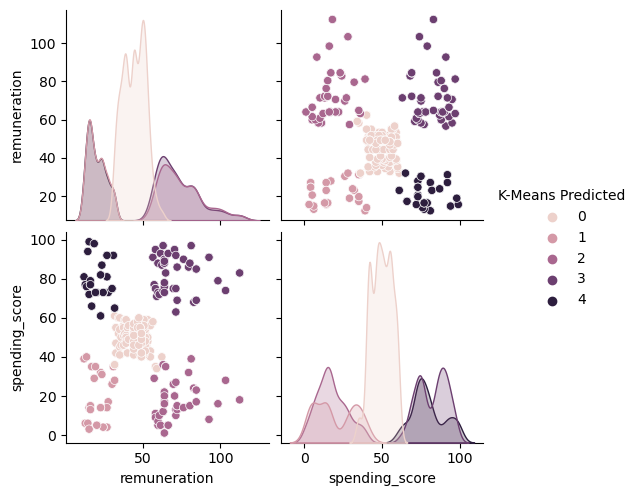

In [9]:
# Fit five clusters.
kmeans = KMeans(n_clusters = 5, max_iter = 1500, init = 'k-means++', random_state = 0).fit(c)

clusters = kmeans.labels_
c['K-Means Predicted'] = clusters

sns.pairplot(c, hue = 'K-Means Predicted', diag_kind = 'kde')

# Save and export figure.
plt.savefig('Clusterspairplot.png')

In [10]:
# Print the values.
c['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

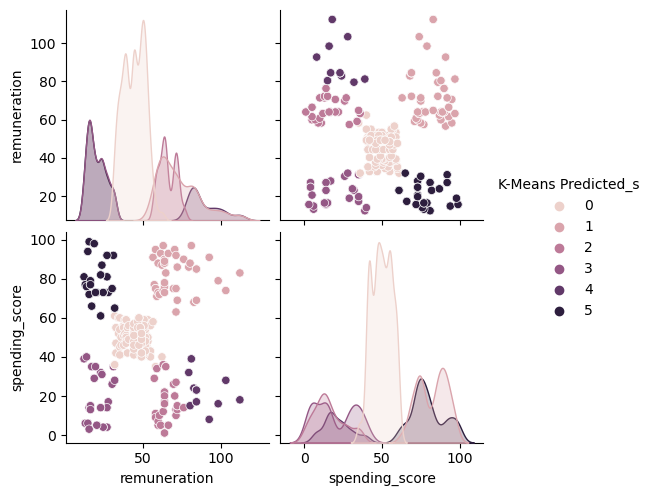

In [11]:
# Fit nine clusters.
cl = turtle_clustering[['remuneration', 'spending_score']]

kmeans_s = KMeans(n_clusters = 6, max_iter = 1500, init = 'k-means++', random_state = 0).fit(cl)

clusters = kmeans_s.labels_
cl['K-Means Predicted_s'] = clusters

sns.pairplot(cl, hue = 'K-Means Predicted_s', diag_kind = 'kde')

In [12]:
# Print the values.
cl['K-Means Predicted_s'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted_s, dtype: int64

## 5. Fit final model and justify your choice

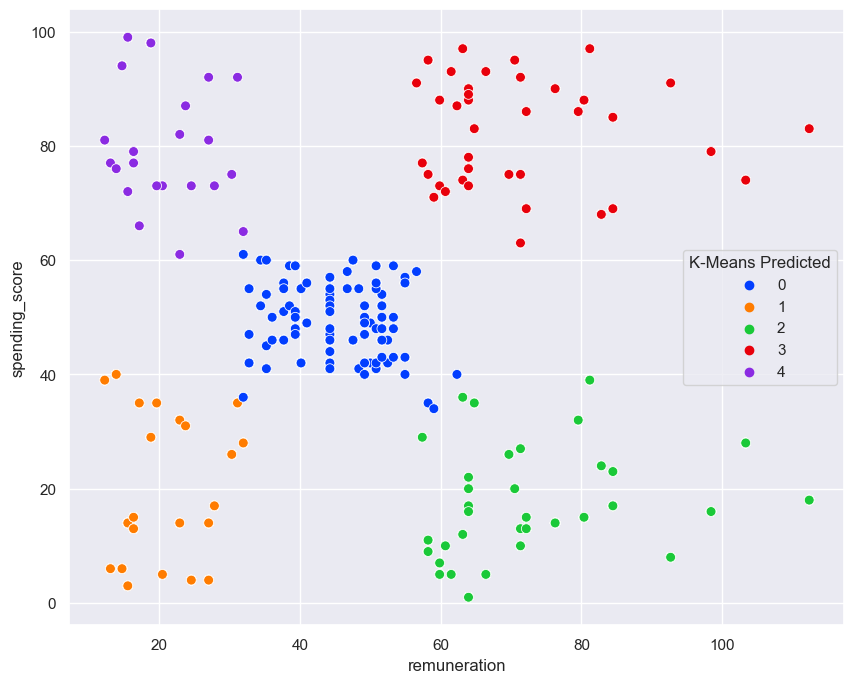

In [10]:
# Visualise the five clusters with 2D plot.
sns.set(rc = {'figure.figsize': (10, 8)})

sns.scatterplot(x = 'remuneration', y = 'spending_score', data = c, hue = 'K-Means Predicted',
               palette = 'bright', s = 50)

# Save and export figure.
plt.savefig('FinalClusters.png')

In [14]:
# Check the number of observations per predicted class.
# Check k-means predicted.
c

,remuneration,spending_score,K-Means Predicted
0,12.30,39,1
1,12.30,81,4
2,13.12,6,1
3,13.12,77,4
4,13.94,40,1
...,...,...,...
1995,84.46,69,3
1996,92.66,8,2
1997,92.66,91,3
1998,98.40,16,2


## Observations

K-Means clustering clearly shows five groups.
- Group 2 have high income, more or better advertisements can attract those customers.
- Group 3 shows quite good interest to company's product and high income.


# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website.


## 1. Load and explore the data

In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set as df3.
df3 = pd.read_csv('Desktop/ASSIGNMENT-3/turtle_reviews_clean.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [4]:
# Subset the dataframe.
reviews = df3[['review', 'summary']]

# View DataFrame.
reviews.tail()

,review,summary
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars
1999,This game is fun. A lot like scrabble without ...,Love this game


In [5]:
# Determine if there are any missing values.
reviews.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [6]:
# Change all to lower case and join with a space. Review column
reviews['review'] = reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [7]:
# Change all to lower case and join with a space. Summary column
reviews['summary'] = reviews['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [8]:
# Check the output.
reviews.head()

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [9]:
# Replace all the puncuations in review column.
reviews['review'] = reviews['review'].str.replace('[^\w\s]', '')

In [10]:
# Replace all the puncuations in summary column.
reviews['summary'] = reviews['summary'].str.replace('[^\w\s]', '')

In [11]:
# View all text.
pd.set_option('display.max_colwidth', 1)
reviews.head()

,review,summary
0,when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,the fact that 50 of this space is wasted on art and not terribly informative or needed art
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9
2,nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,pretty but also pretty useless
3,amazing buy bought it as a gift for our new dm and its perfect,five stars
4,as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,money trap


### 2c) Drop duplicates in both columns

In [12]:
# Determine if there are any duplicates.
reviews.duplicated().sum()

39

In [13]:
# Drop duplicates in both columns.
reviews_data = reviews.drop_duplicates(keep = False)

In [14]:
# Check the output.
reviews_data.duplicated().sum()

0

In [15]:
# Reset index.
reviews_data.reset_index(inplace = True)

# View the dataframe.
reviews_data.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,the fact that 50 of this space is wasted on art and not terribly informative or needed art
1,1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9
2,2,nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this storm giants one is decent for a few tables it includes but really misses the mark maybe they should ask a few dms what they would use,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm and its perfect,five stars
4,4,as my review of gf9s previous screens these were completely unnecessary and nearly useless skip them this is the definition of a waste of money,money trap


## 3. Tokenise and create wordclouds

In [16]:
# Create copy of dataframe.
reviews_copy = reviews_data[['review', 'summary']]

In [17]:
# Apply tokenisation to both columns.
reviews_copy['tokens_review'] = reviews_copy['review'].apply(word_tokenize)
reviews_copy['tokens_summary'] = reviews_copy['summary'].apply(word_tokenize)

In [18]:
# Review: Create a word cloud.
text = " ".join(review for review in reviews_copy.review)

wordcloud = WordCloud(width = 1600, height = 900,
                     background_color = 'white',
                     colormap = 'plasma',
                     stopwords = 'none',
                     min_font_size = 10).generate(text)

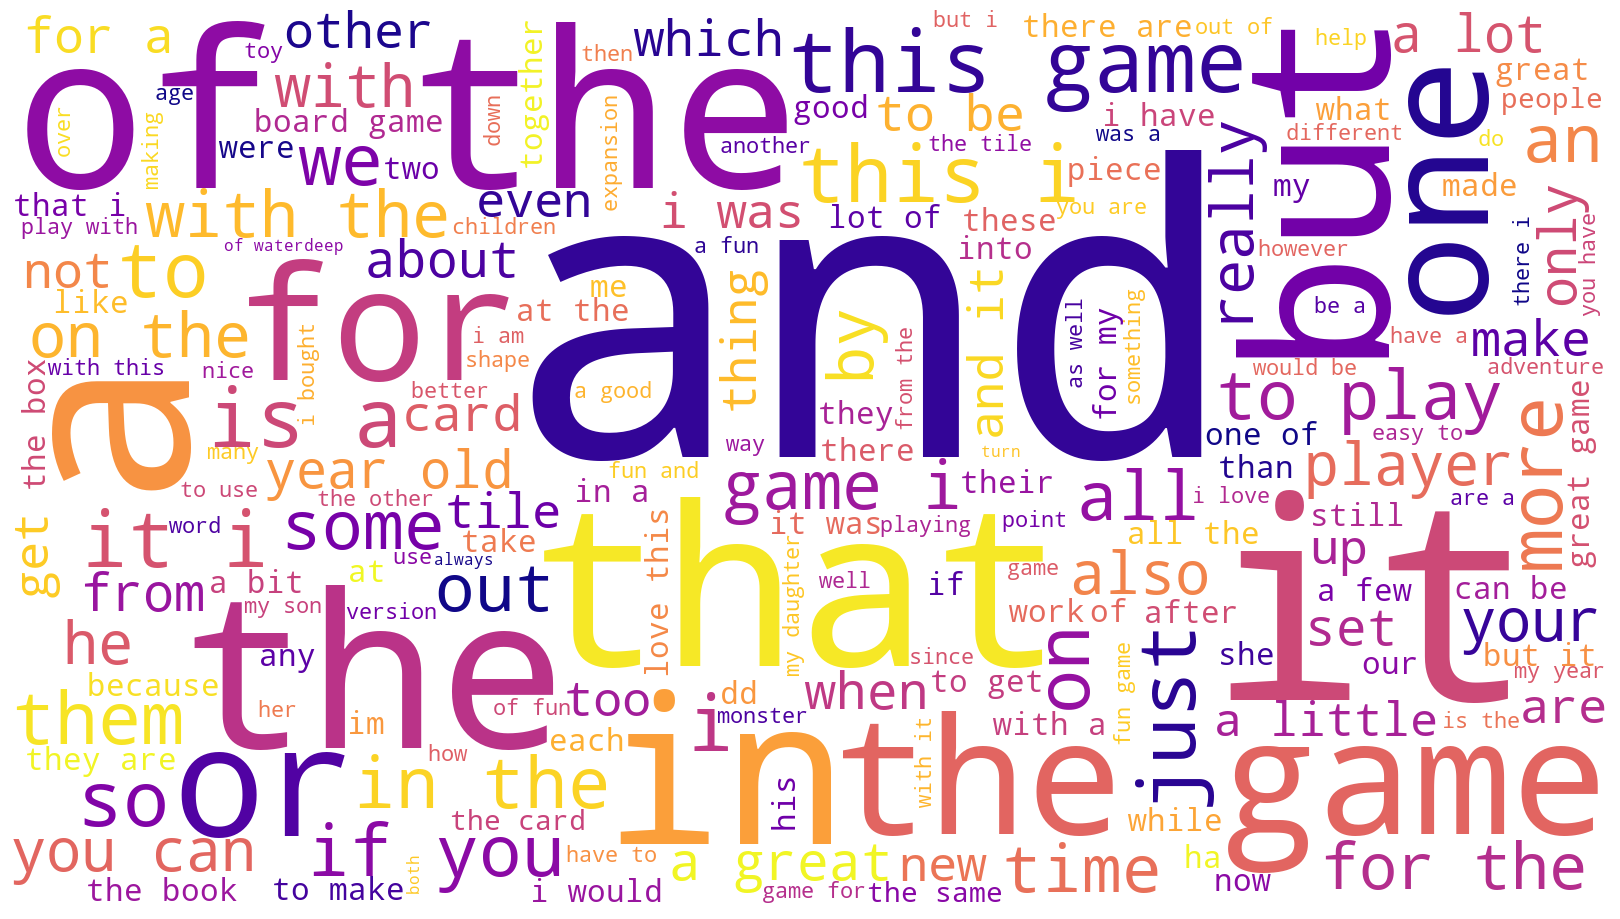

In [19]:
# Review: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(reviews_copy.shape[0]):
    all_tokens = all_tokens + reviews_copy['tokens_review'][i]

In [20]:
# Summary: Create a word cloud.
text = " ".join(review for review in reviews_copy.summary)

wordcloud = WordCloud(width = 1600, height = 900,
                     background_color = 'white',
                     colormap = 'plasma',
                     stopwords = 'none',
                     min_font_size = 10).generate(text)

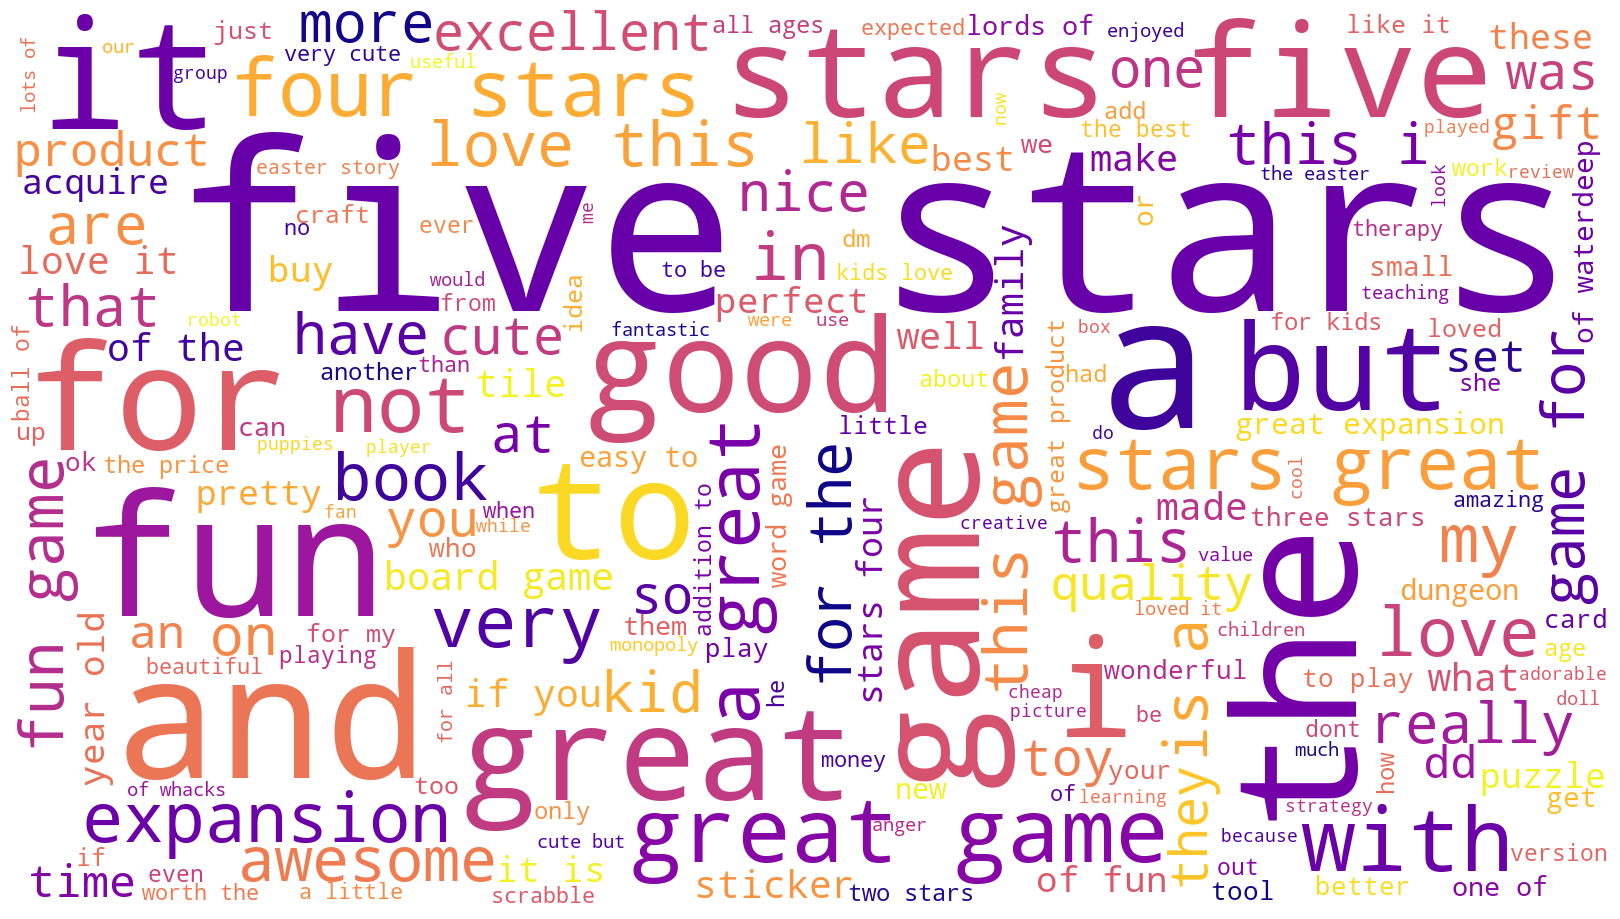

In [21]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

all_tokens = []
for i in range(reviews_copy.shape[0]):
    all_tokens = all_tokens + reviews_copy['tokens_summary'][i]

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [22]:
# Determine the frequency distribution.
fdist = FreqDist(all_tokens)

# Show five most common words.
fdist.most_common(5)

[('stars', 406), ('five', 321), ('game', 319), ('great', 295), ('the', 261)]

### 4b) Remove alphanumeric characters and stopwords

In [23]:
# Delete all the alpanum.
tokensa = [word for word in all_tokens if word.isalnum()]

In [29]:
# Remove all the stopwords
english_stopwords = set(stopwords.words('english'))

tokensb = [x for x in tokensa if x.lower() not in english_stopwords]
tokens_string = ''

for value in tokensb:
    tokensb_string = tokensb_string + value + ' '

### 4c) Create wordcloud without stopwords

In [30]:
# Create a wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900,
                     background_color = 'white',
                     colormap = 'plasma',
                     stopwords = 'none',
                     min_font_size = 7).generate(tokensb_string)


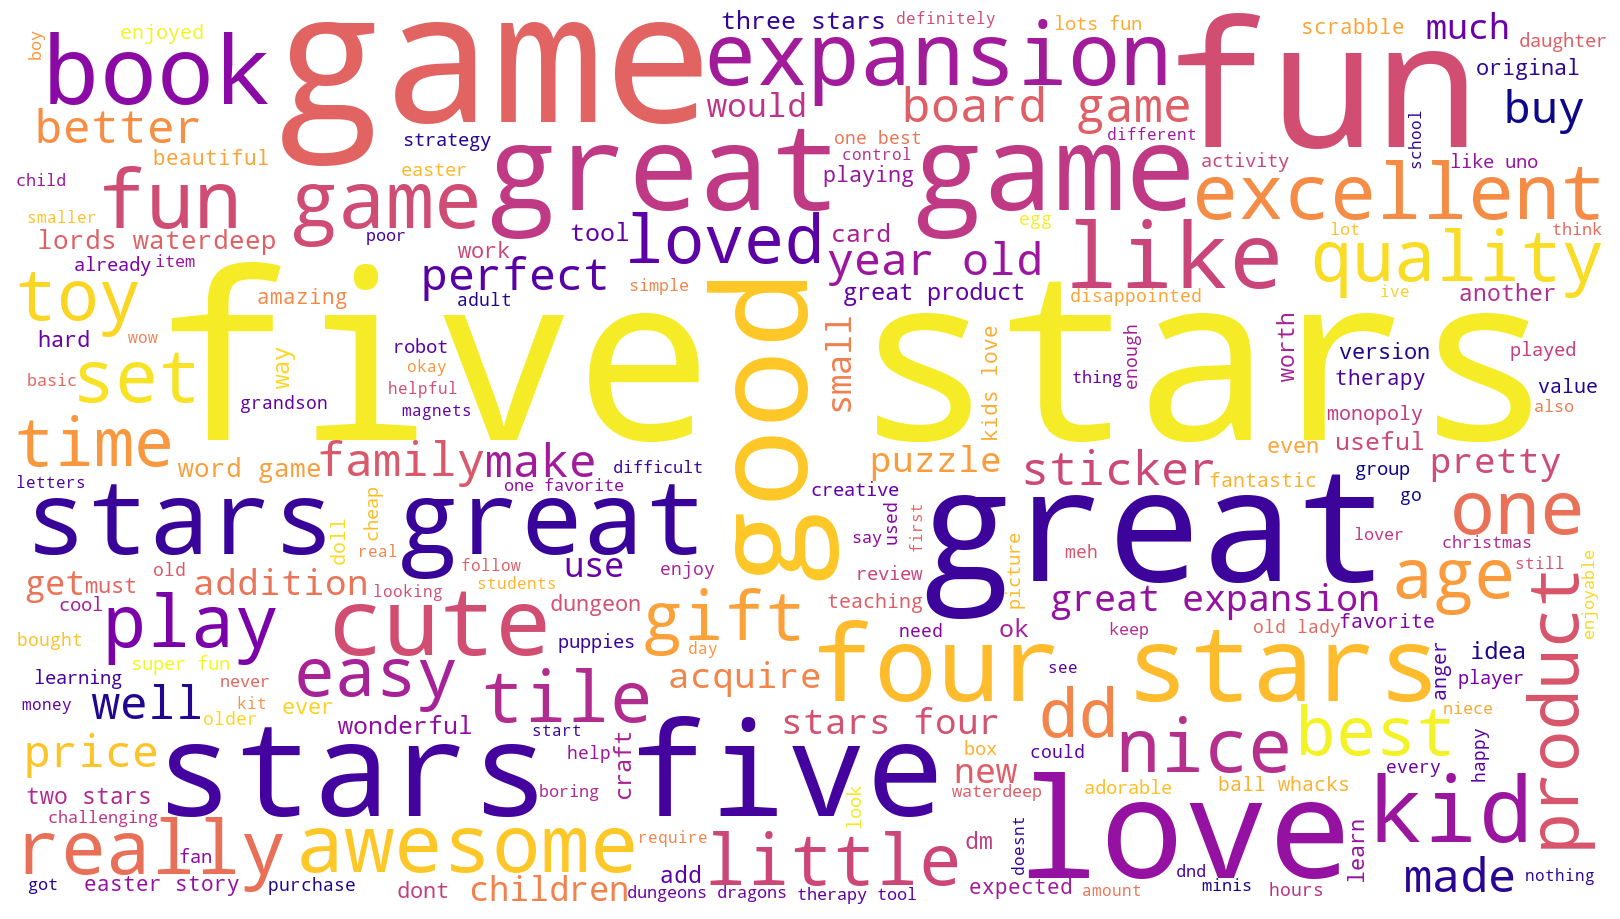

FreqDist({'stars': 406, 'five': 321, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

In [31]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

fdist1 = FreqDist(tokensb)
fdist1

### 4d) Identify 15 most common words and polarity

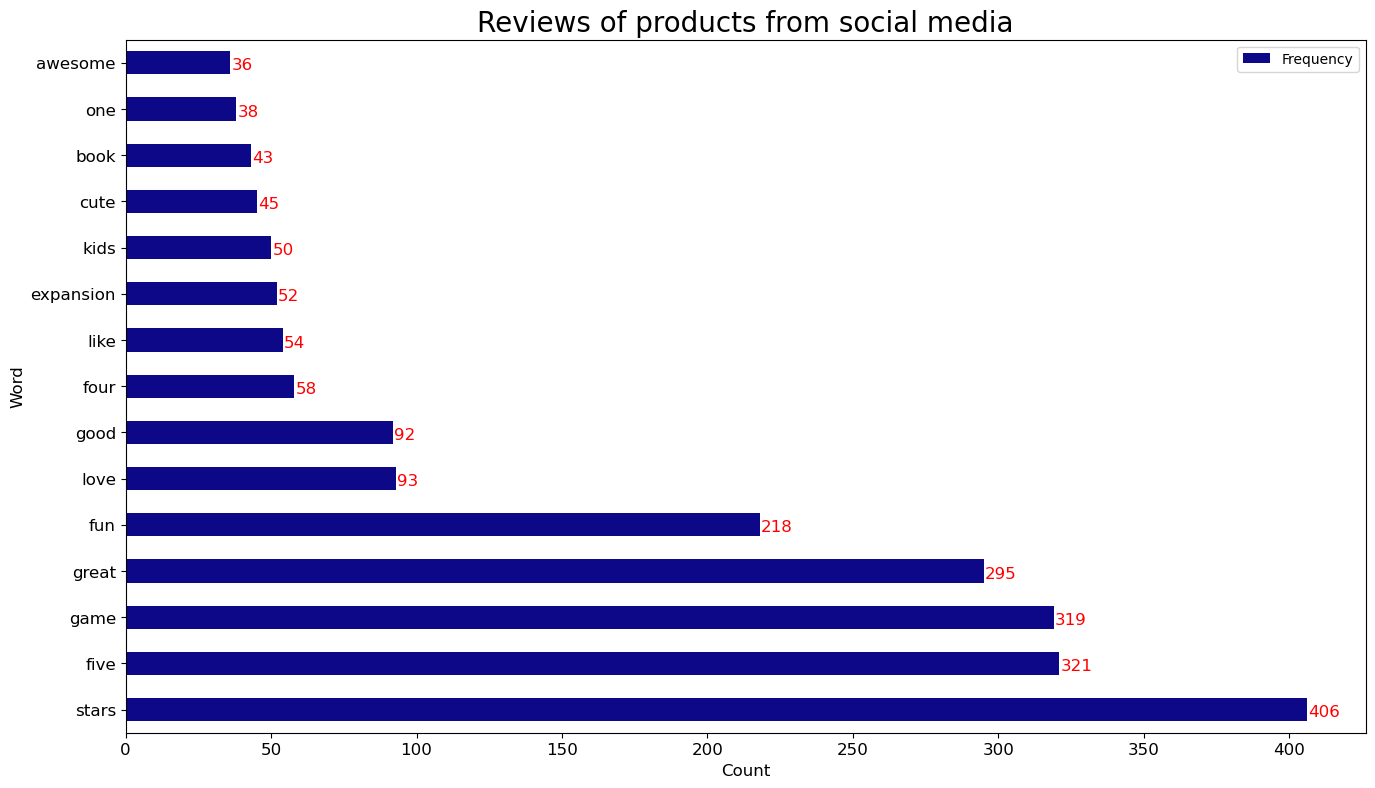

In [33]:
# Determine the 15 most common words.
counts = pd.DataFrame(Counter(tokensb).most_common(15),
                     columns = ['Word', 'Frequency']).set_index('Word')

ax = counts.plot(kind = 'barh', figsize = (16, 9), fontsize = 12, colormap = 'plasma')
ax.set_title("Reviews of products from social media", fontsize = 20)
ax.set_xlabel("Count", fontsize = 12)
ax.set_ylabel("Word", fontsize = 12)

for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)), fontsize = 12, color = 'red')

    # Save and export figure.
plt.savefig('mostcommon15.png')

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [34]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [35]:
# Determine polarity of both columns. 
reviews_copy['polarity_reviews'] = reviews_copy['review'].apply(generate_polarity)
reviews_copy['polarity_summary'] = reviews_copy['summary'].apply(generate_polarity)

# View output.
reviews_copy.head()

,review,summary,tokens_review,tokens_summary,polarity_reviews,polarity_summary
0,when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely,the fact that 50 of this space is wasted on art and not terribly informative or needed art,"[when, it, comes, to, a, dms, screen, the, space, on, the, screen, itself, is, at, an, absolute, premium, the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art, as, well, makes, it, completely, useless, the, only, reason, that, i, gave, it, 2, stars, and, not, 1, was, that, technically, speaking, it, can, at, least, still, stand, up, to, block, your, notes, and, dice, rolls, other, than, that, it, drops, the, ball, completely]","[the, fact, that, 50, of, this, space, is, wasted, on, art, and, not, terribly, informative, or, needed, art]",-0.036111,0.15
1,an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could have been easily reduced to a single panel in size and the few table you have are nighuseless themselves in short stop making crap dm screens,another worthless dungeon masters screen from galeforce9,"[an, open, letter, to, galeforce9, your, unpainted, miniatures, are, very, not, bad, your, spell, cards, are, great, your, board, games, are, meh, your, dm, screens, however, are, freaking, terrible, im, still, waiting, for, a, single, screen, that, isnt, polluted, with, pointless, artwork, where, useful, referenceable, tables, should, be, once, again, youve, created, a, single, use, screen, that, is, only, useful, when, running, the, storm, kings, thunder, adventure, even, despite, the, fact, that, its, geared, to, that, adventure, path, its, usefulness, negligible, at, best, i, massive, swath, of, the, inner, panel, is, wasted, on, artwork, and, a, bloated, overland, map, which, ...]","[another, worthless, dungeon, masters, screen, from, galeforce9]",0.035952,-0.80
2,nice art nice printing why two panels are filled with a general forgotten realms map is beyond me most of one of them is all blue ocean such a waste i dont understand why they cant make these dm screens more useful for these kinds of adventures rather than solely the specific adventure youre supposed to be able to transpose this adventure to other lands outside the forgotten realms so even just a list of new monsters or npcs would at least be useful than the map even more would just be stuff related to running the game but broaduse stuff related to giants same thing with curse of strahd why not make it useful for raven loft undead or horror campaigns in general instead a huge amount of screen space is solely mapping out castle ravenloft which is only useful during a small fraction of the time even for the curse of strahd adventure let alone various other ravenloft adventuring they really kill the extended use of these screens by not thinking about their potential use both for the adventure in question as well as use in a broader sense the rage of demons screen is far more useful for broad under dark adventuring covering a lot of rules for the various conditions you may suffer and the map is only one panel this sto

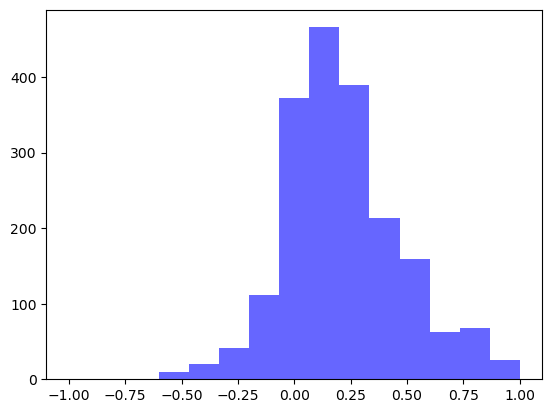

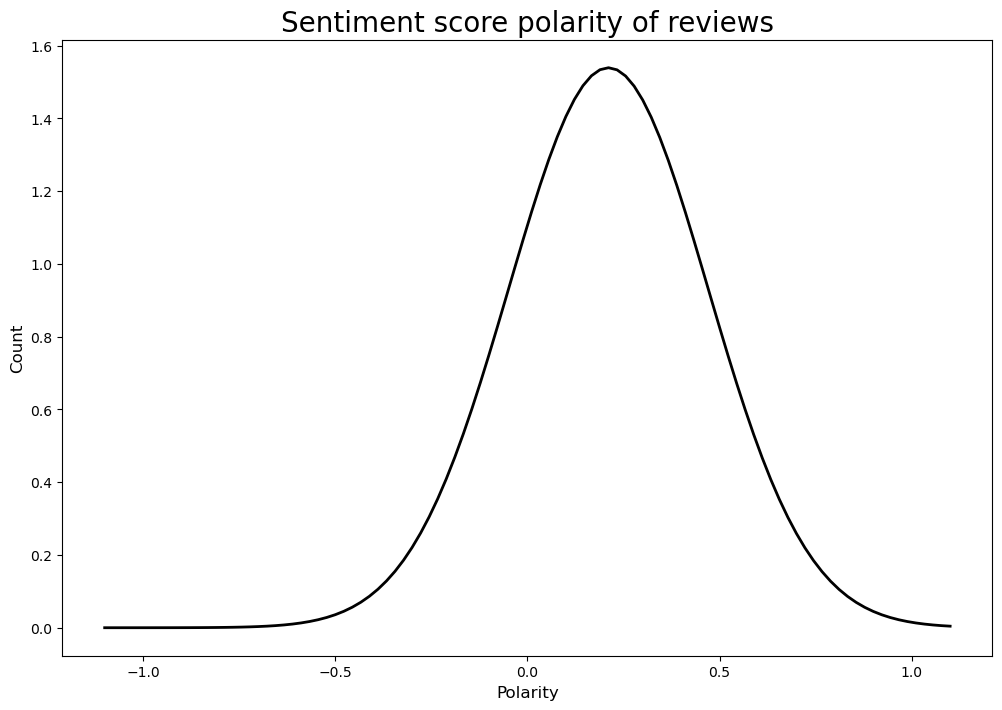

<Figure size 640x480 with 0 Axes>

In [36]:
# Review: Create a histogram plot with bins = 15.
num_bins = 15

# Histogram of polarity.
plt.hist(reviews_copy['polarity_reviews'], num_bins, facecolor = 'blue', alpha = .6)

# Histogram of sentiment score.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(reviews_copy['polarity_reviews'])
p = norm.pdf(x, mu, std)

plt.figure(figsize = (12, 8))
plt.plot(x, p, 'k', linewidth = 2)
plt.xlabel("Polarity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Sentiment score polarity of reviews", fontsize = 20)
plt.show()

# Save and export figure.
plt.savefig('Polarity.png')

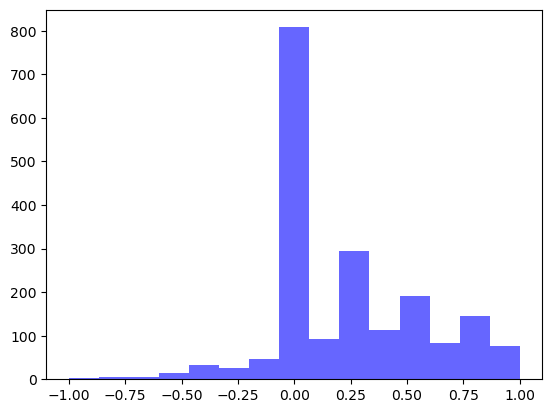

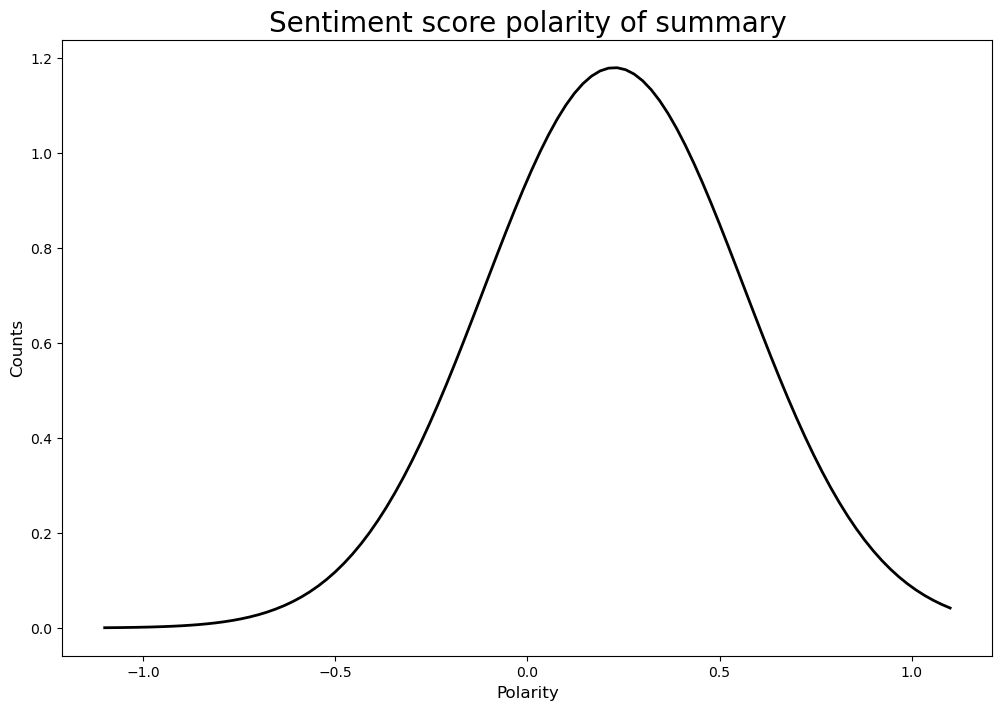

<Figure size 640x480 with 0 Axes>

In [37]:
# Summary: Create a histogram plot with bins = 15.
num_bins = 15
# Histogram of polarity.
plt.hist(reviews_copy['polarity_summary'], num_bins, facecolor = 'blue', alpha = .6)

# Histogram of sentiment score.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
mu, std = norm.fit(reviews_copy['polarity_summary'])
p = norm.pdf(x, mu, std)

plt.figure(figsize = (12, 8))
plt.plot(x, p, 'k', linewidth = 2)
plt.xlabel("Polarity", fontsize = 12)
plt.ylabel("Counts", fontsize = 12)
plt.title("Sentiment score polarity of summary", fontsize = 20)
plt.show()

# Save and export figure.
plt.savefig('Polaritysummary.png')

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [38]:
# Top 20 negative reviews.
negative_sentiment_reviews = reviews_copy.nsmallest(20, 'polarity_reviews')
negative_sentiment_reviews_fin = negative_sentiment_reviews[['review', 'polarity_reviews']]
negative_sentiment_reviews_fin.style.set_properties(subset = ['review'], **{'width' : '1200px'})

# View output.
print(negative_sentiment_reviews_fin)

                                                                                                                                                                                                                                                                                                                 review  \
203   booo unles you are patient know how to measure i didnt have the patience neither did my daughter boring unless you are a craft person which i am not                                                                                                                                                                
177   incomplete kit very disappointing                                                                                                                                                                                                                                                                                   
1755  im sorry i just find this product to be boring an

In [39]:
# Top 20 negative summaries.
negative_sentiment_summary = reviews_copy.nsmallest(20, 'polarity_summary')
negative_sentiment_summary_fin = negative_sentiment_summary[['summary', 'polarity_summary']]
negative_sentiment_summary_fin.style.set_properties(subset = ['summary'], **{'width' : '1200px'})

# View output.
print(negative_sentiment_summary_fin)

                                                                          summary  \
21    the worst value ive ever seen                                                 
203   boring unless you are a craft person which i am                               
812   boring                                                                        
1137  before this i hated running any rpg campaign dealing with towns because it    
1     another worthless dungeon masters screen from galeforce9                      
139   disappointed                                                                  
618   disappointed                                                                  
778   disappointed                                                                  
1573  disappointed                                                                  
356   promotes anger instead of teaching calming methods                            
868   too bad this is not what i was expecting                   

In [40]:
# Top 20 positive reviews.
positive_sentiment_reviews = reviews_copy.nlargest(20, 'polarity_reviews')
positive_sentiment_reviews_fin = positive_sentiment_reviews[['review', 'polarity_reviews']]
positive_sentiment_reviews_fin.style.set_properties(subset = ['review'], **{'width' : '1200px'})

# View output.
print(positive_sentiment_reviews_fin)

                                                                                      review  \
7     came in perfect condition                                                                
160   awesome book                                                                             
189   awesome gift                                                                             
484   excellent activity for teaching selfmanagement skills                                    
512   perfect just what i ordered                                                              
578   wonderful product                                                                        
596   delightful product                                                                       
608   wonderful for my grandson to learn the resurrection story                                
775   perfect                                                                                  
1110  awesome set                       

In [41]:
# Top 20 positive summaries.
positive_sentiment_summary = reviews_copy.nlargest(20, 'polarity_summary')
positive_sentiment_summary_fin = positive_sentiment_reviews[['summary', 'polarity_summary']]
positive_sentiment_summary_fin.style.set_properties(subset = ['summary'], **{'width' : '1200px'})

# View output.
print(positive_sentiment_summary_fin)

                       summary  polarity_summary
7     five stars                0.0             
160   five stars                0.0             
189   five stars                0.0             
484   five stars                0.0             
512   five stars                0.0             
578   five stars                0.0             
596   five stars                0.0             
608   five stars                0.0             
775   aquire game              -0.4             
1110  five stars                0.0             
1139  five stars                0.0             
1148  five stars                0.0             
1271  five stars                0.0             
1367  five stars                0.0             
1505  awesome seller thank you  1.0             
1562  five stars                0.0             
1666  five stars                0.0             
1671  three stars               0.0             
1677  five stars                0.0             
1908  tutoring      

## 7. Discuss: Insights and observations

***Your observations here...***

# 